In [22]:
from helper import *

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
def cleaning(str):
    str = str
    return str

In [25]:
import pandas as pd
from numpy import array

fo = pd.ExcelFile('news.xlsx')
df = pd.read_excel(fo, 'Sheet1')

data = df.head(5)

text = df['text']
text_list =  [i.split() for i in text]
print(len(text_list))
#print(text_list)

4540


In [26]:
'''
#Create Biagram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])

for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
'''

"\n#Create Biagram & Trigram Models \nfrom gensim.models import Phrases\n# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.\nbigram = Phrases(text_list, min_count=10)\ntrigram = Phrases(bigram[text_list])\n\nfor idx in range(len(text_list)):\n    for token in bigram[text_list[idx]]:\n        if '_' in token:\n            # Token is a bigram, add to document.\n            text_list[idx].append(token)\n    for token in trigram[text_list[idx]]:\n        if '_' in token:\n            # Token is a bigram, add to document.\n            text_list[idx].append(token)\n"

In [27]:
from gensim import corpora
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=10, no_above=0.2)
print(dictionary)

Dictionary(1353 unique tokens: ['air', 'aktivitas', 'api', 'bahan', 'baik']...)


In [28]:
print(dictionary[9])

berfungsi


In [29]:
#build corpus
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#corpora.MmCorpus.serialize('corpus.mm', doc_term_matrix)

print(len(doc_term_matrix))
print(doc_term_matrix[100])

4540
[(97, 1), (138, 1), (236, 1), (373, 1), (421, 1), (480, 1), (481, 1)]


In [30]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(doc_term_matrix, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

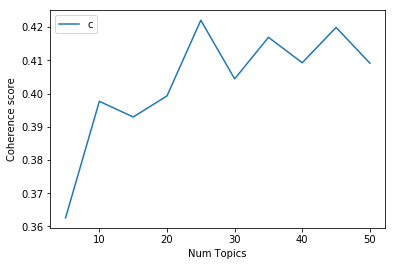

In [31]:
start=5
limit=51
step=5
model_list, coherence_values = compute_coherence_values(dictionary, corpus=doc_term_matrix, texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [32]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.3626
Num Topics = 10  has Coherence Value of 0.3977
Num Topics = 15  has Coherence Value of 0.3929
Num Topics = 20  has Coherence Value of 0.3993
Num Topics = 25  has Coherence Value of 0.4221
Num Topics = 30  has Coherence Value of 0.4044
Num Topics = 35  has Coherence Value of 0.4169
Num Topics = 40  has Coherence Value of 0.4093
Num Topics = 45  has Coherence Value of 0.4199
Num Topics = 50  has Coherence Value of 0.4091


In [33]:
model = LdaModel(corpus=doc_term_matrix, id2word=dictionary, num_topics=30)
print(model.print_topics(num_topics=30, num_words=10))

[(0, '0.045*"presiden" + 0.029*"gus" + 0.025*"jokowi" + 0.024*"pembangunan" + 0.023*"ribu" + 0.020*"agenda" + 0.019*"tahun" + 0.018*"yakin" + 0.018*"widodo" + 0.018*"joko"'), (1, '0.045*"tahap" + 0.041*"dpr" + 0.039*"komisi" + 0.039*"ri" + 0.033*"jambi" + 0.029*"semarang" + 0.024*"lelang" + 0.023*"juta" + 0.022*"anggota" + 0.019*"kerja"'), (2, '0.115*"holding" + 0.079*"bumn" + 0.033*"pgn" + 0.028*"perusahaan" + 0.025*"gas" + 0.023*"infrastruktur" + 0.022*"pembentukan" + 0.019*"usaha" + 0.015*"saham" + 0.014*"pemerintah"'), (3, '0.071*"penerbangan" + 0.037*"irawan" + 0.033*"semarang" + 0.026*"play" + 0.021*"jambi" + 0.020*"konsumen" + 0.016*"tenaga" + 0.014*"indonesia" + 0.014*"infrastuktur" + 0.013*"infrastruktur"'), (4, '0.035*"perizinan" + 0.034*"kontruksi" + 0.032*"tol" + 0.028*"membentuk" + 0.018*"lrt" + 0.016*"sulawesi" + 0.016*"proyek" + 0.012*"selesai" + 0.012*"tugas" + 0.012*"sertifikasi"'), (5, '0.052*"investasi" + 0.036*"tahun" + 0.024*"triwulan" + 0.021*"infrastruktur" + 0.0

In [34]:
print(doc_term_matrix)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 3), (14, 2), (15, 2), (16, 2), (17, 3), (18, 1), (19, 5), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1), (28, 2), (29, 3), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 2), (39, 1), (40, 2), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1)], [(19, 1)], [(19, 3), (21, 1), (26, 1), (28, 1), (39, 1), (40, 1), (41, 1), (46, 2), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(19, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(19, 1), (69, 1)], [(19, 1), (69, 1), (70, 1), (71, 1)], [(0, 5), (7, 1), (10, 1), (14, 1), (16, 1), (27, 2), (32, 1), (34, 1), (39, 2), (44, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1)], [(16, 1), (17, 1), (19, 1